In [15]:
rm(list = ls())
#install.packages("conf.design")
require("conf.design")
A=rep(c(-1,1),8)
B=rep(c(rep(-1,2),rep(1,2)),4)
C=rep(c(rep(-1,4),rep(1,4)),2)
D=c(rep(-1,8),rep(1,8))
X=matrix(c(rep(1,16),A,B,C,D),nrow=16,ncol=5)
#Beta_hat1=solve(t(X)%*%X)%*%t(X)%*%FiltrationRate
FiltrationRate=c(45,71,48,65,68,60,80,65,43,100,45,104,75,86,70,96)
FiltrationRate_Data <- data.frame(FiltrationRate, A,B,C,D)

In [16]:
factor(A)
#res.lm<-lm(FiltrationRate~A+B, data=FiltrationRate_Data)
res.lm<-lm(FiltrationRate~A*B*C*D, data=FiltrationRate_Data)
summary(res.lm)
A1=rep(c(0,1),8)
B1=rep(c(rep(0,2),rep(1,2)),4)
X=matrix(c(rep(1,16),A1,B1),nrow=16,ncol=3)
Beta_hat2=solve(t(X)%*%X)%*%t(X)%*%FiltrationRate

[1] -1 1  -1 1  -1 1  -1 1  -1 1  -1 1  -1 1  -1 1 
Levels: -1 1


Call:
lm(formula = FiltrationRate ~ A * B * C * D, data = FiltrationRate_Data)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  70.0625        NaN     NaN      NaN
A            10.8125        NaN     NaN      NaN
B             1.5625        NaN     NaN      NaN
C             4.9375        NaN     NaN      NaN
D             7.3125        NaN     NaN      NaN
A:B           0.0625        NaN     NaN      NaN
A:C          -9.0625        NaN     NaN      NaN
B:C           1.1875        NaN     NaN      NaN
A:D           8.3125        NaN     NaN      NaN
B:D          -0.1875        NaN     NaN      NaN
C:D          -0.5625        NaN     NaN      NaN
A:B:C         0.9375        NaN     NaN      NaN
A:B:D         2.0625        NaN     NaN      NaN
A:C:D        -0.8125        NaN     NaN      NaN
B:C:D        -1.3125        NaN     NaN      NaN
A:B:C:D       0.6875        NaN     NaN      NaN

Res

In [17]:
res.aov<-aov(FiltrationRate~A*B*C*D,data=FiltrationRate_Data)
summary(res.aov)
summary(res.lm)

            Df Sum Sq Mean Sq
A            1 1870.6  1870.6
B            1   39.1    39.1
C            1  390.1   390.1
D            1  855.6   855.6
A:B          1    0.1     0.1
A:C          1 1314.1  1314.1
B:C          1   22.6    22.6
A:D          1 1105.6  1105.6
B:D          1    0.6     0.6
C:D          1    5.1     5.1
A:B:C        1   14.1    14.1
A:B:D        1   68.1    68.1
A:C:D        1   10.6    10.6
B:C:D        1   27.6    27.6
A:B:C:D      1    7.6     7.6


Call:
lm(formula = FiltrationRate ~ A * B * C * D, data = FiltrationRate_Data)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  70.0625        NaN     NaN      NaN
A            10.8125        NaN     NaN      NaN
B             1.5625        NaN     NaN      NaN
C             4.9375        NaN     NaN      NaN
D             7.3125        NaN     NaN      NaN
A:B           0.0625        NaN     NaN      NaN
A:C          -9.0625        NaN     NaN      NaN
B:C           1.1875        NaN     NaN      NaN
A:D           8.3125        NaN     NaN      NaN
B:D          -0.1875        NaN     NaN      NaN
C:D          -0.5625        NaN     NaN      NaN
A:B:C         0.9375        NaN     NaN      NaN
A:B:D         2.0625        NaN     NaN      NaN
A:C:D        -0.8125        NaN     NaN      NaN
B:C:D        -1.3125        NaN     NaN      NaN
A:B:C:D       0.6875        NaN     NaN      NaN

Res

In [18]:
res.aov3<-aov(FiltrationRate~factor(A)*factor(B)*factor(C)*factor(D),data=FiltrationRate_Data)
summary(res.aov3)
#Which factors are important? 
#We only have one obs so we need the normal prob. plot

                                        Df Sum Sq Mean Sq
factor(A)                                1 1870.6  1870.6
factor(B)                                1   39.1    39.1
factor(C)                                1  390.1   390.1
factor(D)                                1  855.6   855.6
factor(A):factor(B)                      1    0.1     0.1
factor(A):factor(C)                      1 1314.1  1314.1
factor(B):factor(C)                      1   22.6    22.6
factor(A):factor(D)                      1 1105.6  1105.6
factor(B):factor(D)                      1    0.6     0.6
factor(C):factor(D)                      1    5.1     5.1
factor(A):factor(B):factor(C)            1   14.1    14.1
factor(A):factor(B):factor(D)            1   68.1    68.1
factor(A):factor(C):factor(D)            1   10.6    10.6
factor(B):factor(C):factor(D)            1   27.6    27.6
factor(A):factor(B):factor(C):factor(D)  1    7.6     7.6

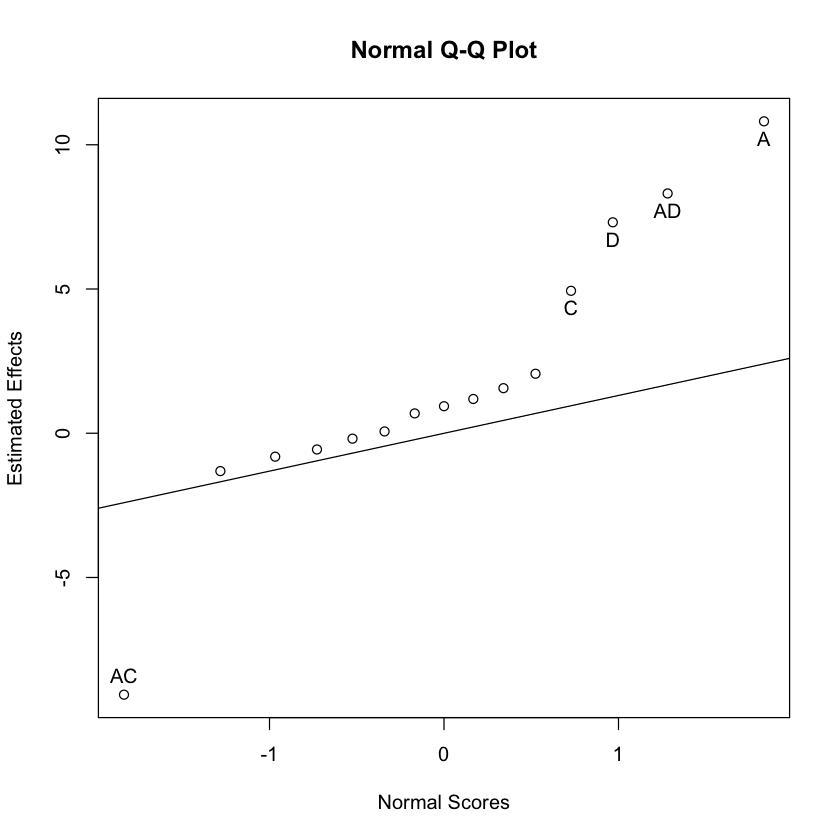

In [19]:
library(daewr)
fullnormal(coef(res.lm)[-1],alpha=.025)

In [20]:
#Projected model
res.aov<-aov(FiltrationRate~A*C*D,data=FiltrationRate_Data)
summary(res.aov)
res.lm<-lm(FiltrationRate~A*C*D, data=FiltrationRate_Data)
summary(res.lm)

            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1 1870.6  1870.6  83.368 1.67e-05 ***
C            1  390.1   390.1  17.384 0.003124 ** 
D            1  855.6   855.6  38.131 0.000267 ***
A:C          1 1314.1  1314.1  58.565 6.00e-05 ***
A:D          1 1105.6  1105.6  49.273 0.000110 ***
C:D          1    5.1     5.1   0.226 0.647483    
A:C:D        1   10.6    10.6   0.471 0.512032    
Residuals    8  179.5    22.4                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Call:
lm(formula = FiltrationRate ~ A * C * D, data = FiltrationRate_Data)

Residuals:
   Min     1Q Median     3Q    Max 
  -6.0   -2.5    0.0    2.5    6.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  70.0625     1.1842  59.164 7.40e-12 ***
A            10.8125     1.1842   9.131 1.67e-05 ***
C             4.9375     1.1842   4.169 0.003124 ** 
D             7.3125     1.1842   6.175 0.000267 ***
A:C          -9.0625     1.1842  -7.653 6.00e-05 ***
A:D           8.3125     1.1842   7.019 0.000110 ***
C:D          -0.5625     1.1842  -0.475 0.647483    
A:C:D        -0.8125     1.1842  -0.686 0.512032    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.737 on 8 degrees of freedom
Multiple R-squared:  0.9687,	Adjusted R-squared:  0.9413 
F-statistic: 35.35 on 7 and 8 DF,  p-value: 2.119e-05


            Df Sum Sq Mean Sq F value   Pr(>F)    
A            1 1870.6  1870.6   95.86 1.93e-06 ***
C            1  390.1   390.1   19.99   0.0012 ** 
D            1  855.6   855.6   43.85 5.92e-05 ***
A:C          1 1314.1  1314.1   67.34 9.41e-06 ***
A:D          1 1105.6  1105.6   56.66 2.00e-05 ***
Residuals   10  195.1    19.5                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


	Shapiro-Wilk normality test

data:  filtration_residuals
W = 0.95347, p-value = 0.5466


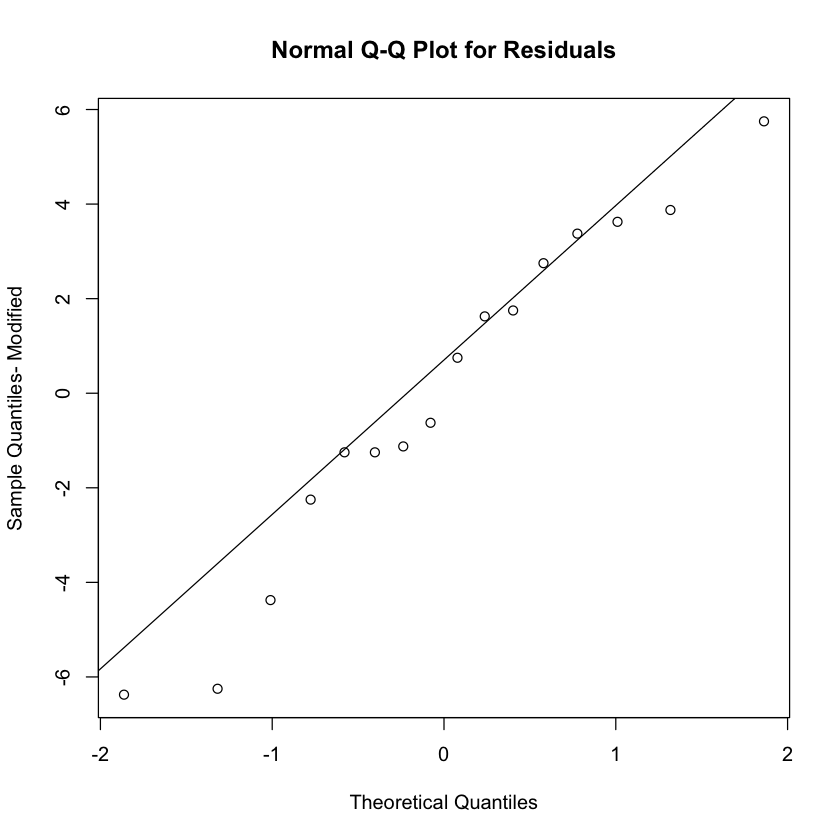

In [21]:
#Final model - remove non-significant terms
res.aov<-aov(FiltrationRate~A*C*D-A:C:D-C:D,data=FiltrationRate_Data)
summary(res.aov)
#Residual Analysis
#Normality
filtration_residuals=res.aov$residuals
qqnorm(filtration_residuals, ylim=c(min(filtration_residuals),max(filtration_residuals)), main = "Normal Q-Q Plot for Residuals",
       xlab = "Theoretical Quantiles", ylab = "Sample Quantiles- Modified",
       plot.it = TRUE, datax = FALSE)

qqline(filtration_residuals, datax = FALSE, distribution = qnorm)
#Test normality using Shapiro Wilks
shapiro.test(filtration_residuals)

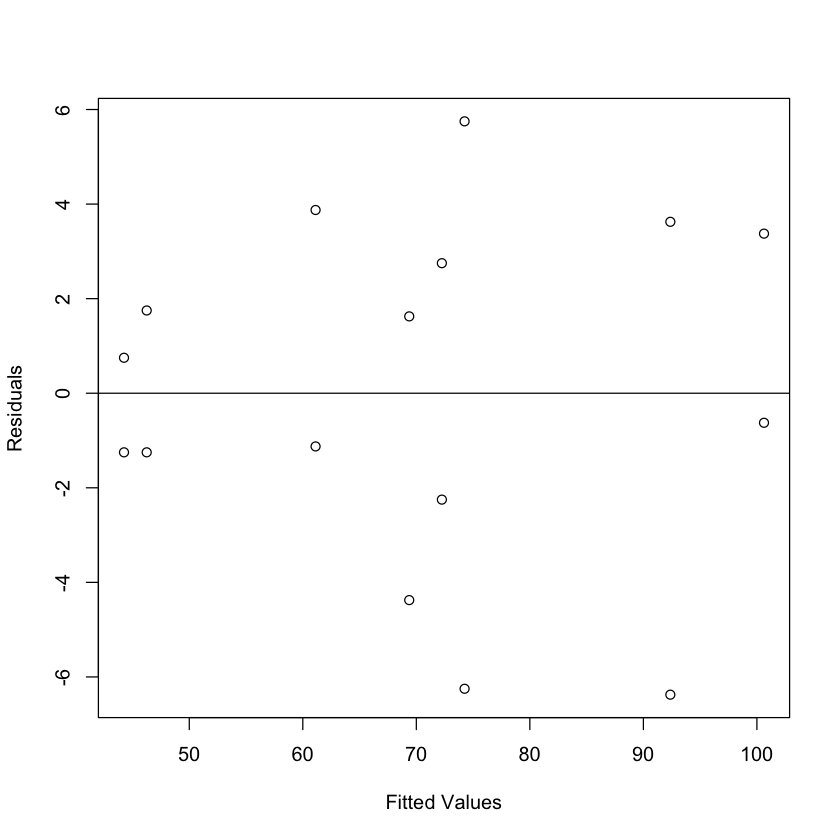

In [22]:
#Check Variance
Fitted_values=res.aov$fitted.values
plot(Fitted_values,filtration_residuals,ylab="Residuals",xlab="Fitted Values")
abline(h=0)

# Chapter 7

In [23]:
#Introducing Block effect- Chapter 7
#Modification 1- confound ABCD with blocks
Block1=c(1,2,2,1,2,1,1,2,2,1,1,2,1,2,2,1)
res.aov2<-aov(FiltrationRate~A*B*C*D-A:B:C:D+Block1,data=FiltrationRate_Data)
summary(res.aov2)

            Df Sum Sq Mean Sq
A            1 1870.6  1870.6
B            1   39.1    39.1
C            1  390.1   390.1
D            1  855.6   855.6
Block1       1    7.6     7.6
A:B          1    0.1     0.1
A:C          1 1314.1  1314.1
B:C          1   22.6    22.6
A:D          1 1105.6  1105.6
B:D          1    0.6     0.6
C:D          1    5.1     5.1
A:B:C        1   14.1    14.1
A:B:D        1   68.1    68.1
A:C:D        1   10.6    10.6
B:C:D        1   27.6    27.6

In [24]:
  #Modified response variable
FiltrationRate_Mod=FiltrationRate;
FiltrationRate_Mod[Block1==1]=FiltrationRate_Mod[Block1==1]-20
FiltrationRate_Data_Mod <- data.frame(FiltrationRate_Mod, A,B,C,D)
res.aov2<-aov(FiltrationRate_Mod~A*B*C*D-A:B:C:D+Block1,data=FiltrationRate_Data_Mod)
summary(res.aov2)

            Df Sum Sq Mean Sq
A            1 1870.6  1870.6
B            1   39.1    39.1
C            1  390.1   390.1
D            1  855.6   855.6
Block1       1 1387.6  1387.6
A:B          1    0.1     0.1
A:C          1 1314.1  1314.1
B:C          1   22.6    22.6
A:D          1 1105.6  1105.6
B:D          1    0.6     0.6
C:D          1    5.1     5.1
A:B:C        1   14.1    14.1
A:B:D        1   68.1    68.1
A:C:D        1   10.6    10.6
B:C:D        1   27.6    27.6

In [25]:
res.aov3<-aov(FiltrationRate_Mod~A*B*C*D,data=FiltrationRate_Data_Mod)
#summary(res.aov3)

In [26]:
res.lm2<-lm(FiltrationRate~A*B*C*D, data=FiltrationRate_Data)
#fullnormal(coef(res.lm2)[-1],alpha=.025)


Call:
lm(formula = FiltrationRate_Mod ~ A * B * C * D - A:B:C:D + Block1, 
    data = FiltrationRate_Data_Mod)

Residuals:
ALL 16 residuals are 0: no residual degrees of freedom!

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  32.1250        NaN     NaN      NaN
A            10.8125        NaN     NaN      NaN
B             1.5625        NaN     NaN      NaN
C             4.9375        NaN     NaN      NaN
D             7.3125        NaN     NaN      NaN
Block1       18.6250        NaN     NaN      NaN
A:B           0.0625        NaN     NaN      NaN
A:C          -9.0625        NaN     NaN      NaN
B:C           1.1875        NaN     NaN      NaN
A:D           8.3125        NaN     NaN      NaN
B:D          -0.1875        NaN     NaN      NaN
C:D          -0.5625        NaN     NaN      NaN
A:B:C         0.9375        NaN     NaN      NaN
A:B:D         2.0625        NaN     NaN      NaN
A:C:D        -0.8125        NaN     NaN      NaN
B:C:D        -1.3125 

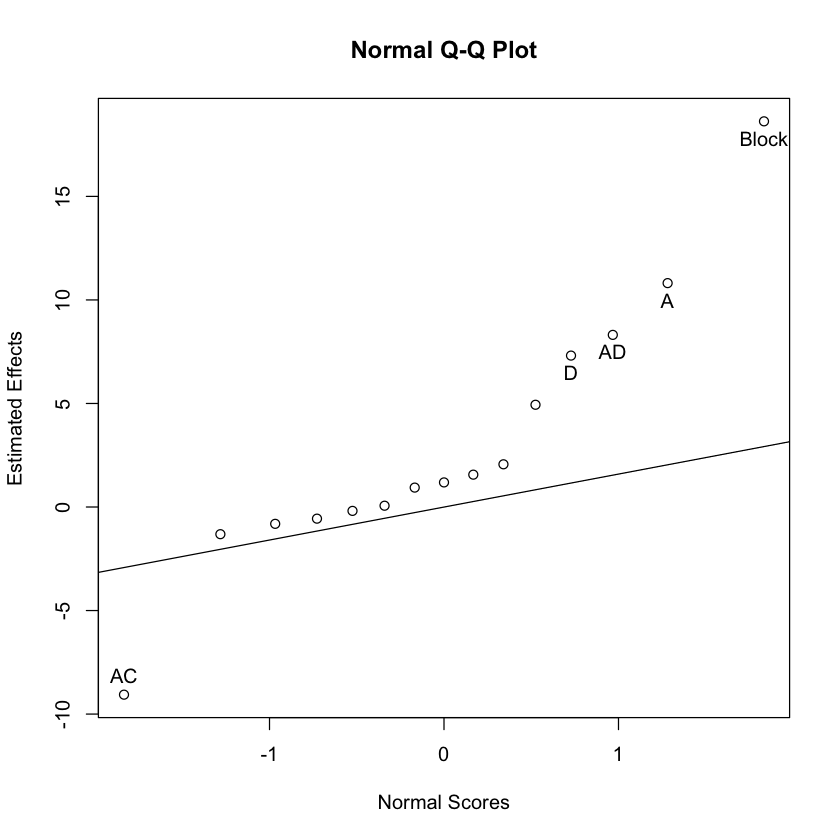

In [27]:
res.lm2<-lm(FiltrationRate_Mod~A*B*C*D-A:B:C:D+Block1,data=FiltrationRate_Data_Mod)
summary(res.lm2)
fullnormal(coef(res.lm2)[-1],alpha=.025)